In [1]:
from ssri_interactions.config import Config
from ssri_interactions.io import load_derived_generic
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from ssri_interactions.plots import PAL_GREY_BLACK

sns.set_theme(style='ticks', context="paper")

In [10]:
neuron_types = load_derived_generic("neuron_types.csv")

pairwise_dir = Config.derived_data_dir / "corrs"
rsc = (
    pd.read_parquet(pairwise_dir / "spont - corr.parquet")
    .rename(columns=dict(corr="value"))
    .query("bin_width <= 1")
    .assign(metric="rsc")
    .assign(
        mag=lambda x: np.abs(x["value"]),
        rec=lambda x: np.where(x["value"] > 0, x["value"], 0)
        )
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query('group in ("SAL", "CIT")')
    .drop_duplicates()
)
pcorr = (
    pd.read_parquet(pairwise_dir / "spont - pcorr.parquet")
    .rename(columns=dict(pcorr="value"))
    .assign(metric="pcorr")
    .assign(
        mag=lambda x: np.abs(x["value"]),
        rec=lambda x: np.where(x["value"] > 0, x["value"], 0)
        )
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query('group in ("SAL", "CIT")')
    .drop_duplicates()
)
pcup = (
    pd.read_parquet(pairwise_dir / "spont - pcup.parquet")
    .rename(columns=dict(cc="value"))
    .assign(metric="pcup")
    .assign(
        mag=lambda x: np.abs(x["value"]),
        rec=lambda x: np.where(x["value"] > 0, x["value"], 0)
        )
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query('group in ("SAL", "CIT")')
    .drop_duplicates()
)
graph = (
    pd.read_parquet(Config.derived_data_dir / "graph" / "spont - graph.parquet")
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query('group in ("SAL", "CIT")')
    .drop_duplicates()
)
ensembles = (
    load_derived_generic("ensembles/spont - ensembles.csv")
    .query("sig == True")
    .groupby(["bin_width", "session_name"])["ensemble"]
    .nunique()
    .to_frame("Number of Ensembles")
    .reset_index()
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query("bin_width <= 1 and group in ('SAL', 'CIT')")
    .drop_duplicates()
)
seqnmf = (
    load_derived_generic("seqnmf_sequenciness_scores.csv")
    .merge(neuron_types[["session_name", "group"]].drop_duplicates())
    .query("bin_width <= 1 and group in ('SAL', 'CIT')")
    .drop_duplicates()
)

C:\Users\roryl\AppData\Local\Temp\ipykernel_4436\3110415026.py:55: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f.subplots_adjust(hspace=0.7)


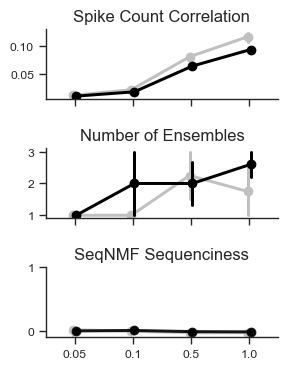

In [11]:
f = plt.figure(figsize=(3, 4), constrained_layout=True)

ax = f.subplots(3, 1, sharex=True)

rsc["rec"] = np.where(rsc["value"] > 0, rsc["value"], 0)
sns.pointplot(
    x="bin_width", 
    y="mag", 
    hue="group", 
    data=rsc, 
    estimator=np.median, 
    ax=ax[0],
    hue_order=["SAL", "CIT"],
    dodge=True, 
        palette=PAL_GREY_BLACK[::-1]

    )
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("Spike Count Correlation",  fontsize=12)

sns.pointplot(
    x="bin_width", 
    y="Number of Ensembles", 
    hue="group", 
    data=ensembles,
    ax=ax[1],
    hue_order=["SAL", "CIT"],
    dodge=True,
        palette=PAL_GREY_BLACK[::-1]

    )
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title("Number of Ensembles",  fontsize=12)

g_seq = sns.pointplot(
    x="bin_width", 
    y="score", 
    hue="group", 
    data=seqnmf, 
    estimator=np.median, 
    ax=ax[2], 
    hue_order=["SAL", "CIT"],
    dodge=True,
    palette=PAL_GREY_BLACK[::-1]
    )
ax[2].set_ylim(-0.1, 1)
plt.setp(g_seq.collections, alpha=.9)
plt.setp(g_seq.lines, alpha=.9) 
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].set_title("SeqNMF Sequenciness", fontsize=12)

f.subplots_adjust(hspace=0.7)
for ax_ in ax:
    ax_.legend().remove()

sns.despine(fig=f)
# f.savefig(fig_dir / "interactions by bin width.png", dpi=300)


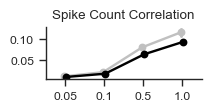

In [16]:
f = plt.figure(figsize=(2, 1), constrained_layout=True)

ax = f.subplots(1, 1, sharex=True)

rsc["rec"] = np.where(rsc["value"] > 0, rsc["value"], 0)
sns.pointplot(
    x="bin_width", 
    y="mag", 
    hue="group", 
    data=rsc, 
    estimator=np.median, 
    ax=ax,
    hue_order=["SAL", "CIT"],
    dodge=True, 
    palette=PAL_GREY_BLACK[::-1],
    scale=0.8,

    )
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Spike Count Correlation",)

ax.legend().remove()
sns.despine(fig=f)